In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install gdown

In [4]:
import gdown

download_link = f'https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4'
gdown.download(download_link, 'dataset.zip', quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4
From (redirected): https://drive.google.com/uc?id=1FD6OKhqwygBZC_Xhyj3SVx0q0PbQPTx4&confirm=t&uuid=bc3a74a6-3d9f-4863-a721-839a3b1c49c8
To: /kaggle/working/dataset.zip
100%|██████████| 88.4M/88.4M [00:00<00:00, 114MB/s] 


'dataset.zip'

In [5]:
!unzip "/kaggle/working/dataset.zip"

Archive:  /kaggle/working/dataset.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/1073.jpeg  
  inflating: dataset/test/1090.jpeg  
  inflating: dataset/test/1132.jpeg  
  inflating: dataset/test/1133.jpeg  
  inflating: dataset/test/1153.jpeg  
  inflating: dataset/test/12.png     
  inflating: dataset/test/122.jpeg   
  inflating: dataset/test/1222.jpeg  
  inflating: dataset/test/1266.jpeg  
  inflating: dataset/test/1287.jpeg  
  inflating: dataset/test/1335.jpeg  
  inflating: dataset/test/134.jpeg   
  inflating: dataset/test/1348.jpeg  
  inflating: dataset/test/1411.jpeg  
  inflating: dataset/test/1413.jpeg  
  inflating: dataset/test/1415.jpeg  
  inflating: dataset/test/1423.jpeg  
  inflating: dataset/test/1444.jpeg  
  inflating: dataset/test/1455.jpeg  
  inflating: dataset/test/1463.jpeg  
  inflating: dataset/test/1470.jpeg  
  inflating: dataset/test/1477.jpeg  
  inflating: dataset/test/1521.jpeg  
  inflating: dataset/test/1526.jpeg  
 

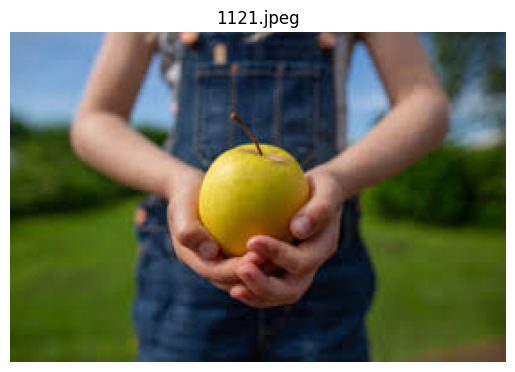

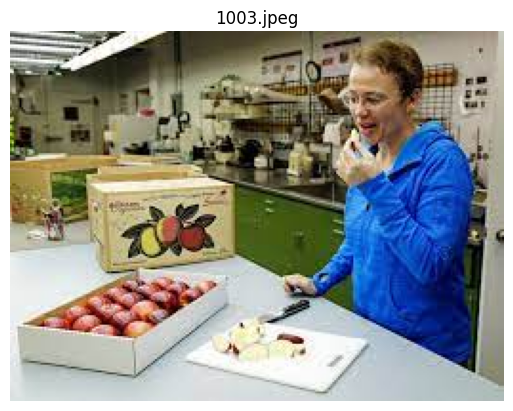

In [6]:
import os
import random  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "/kaggle/working/dataset/train"
def plot_images(directory, num_samples=2):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    selected_images = random.sample(image_files, num_samples)
    for img_name in selected_images:
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)      
        # Display the image
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')
        plt.show()

plot_images(os.path.join(dataset_path, '1'))

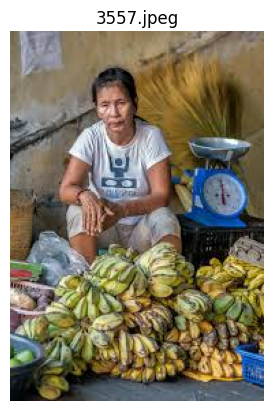

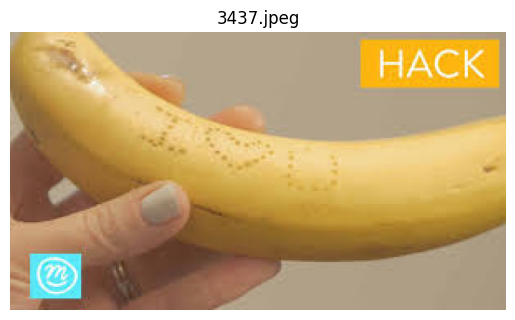

In [7]:
plot_images(os.path.join(dataset_path, '2'))

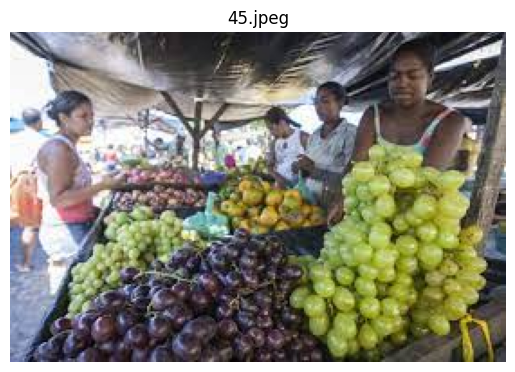

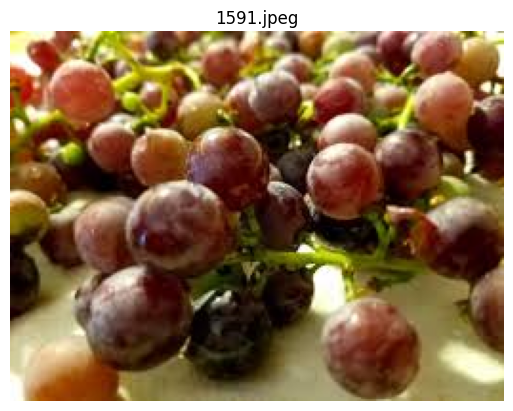

In [8]:
plot_images(os.path.join(dataset_path, '3'))

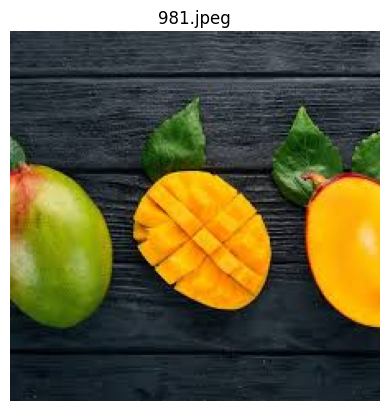

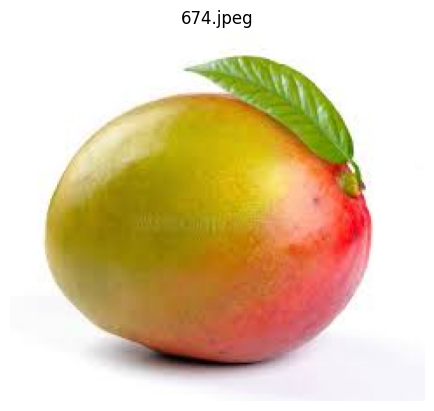

In [9]:
plot_images(os.path.join(dataset_path, '4'))

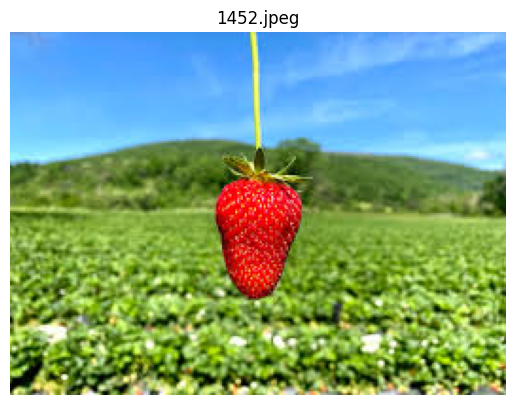

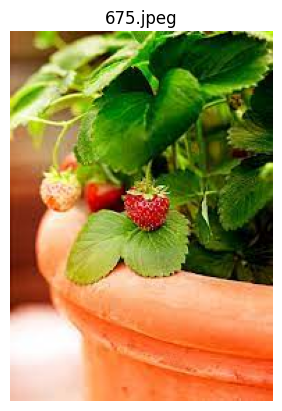

In [10]:
plot_images(os.path.join(dataset_path, '5'))

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os

data = []
labels = []
IMG_SIZE = 150
data_path = '/kaggle/working/dataset/train/'

# Loop through class directories
for class_dir in os.listdir(data_path):
    class_path = os.path.join(data_path, class_dir)

    # Check if the item in the directory is a directory
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv.imread(img_path)
                if img is not None:
                    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(class_dir)
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {img_path}")

print(len(data))
print(len(labels))
print(labels[0])


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


9900
9900
1


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

le = LabelEncoder()
train_labels = le.fit_transform(labels)
train_labels = to_categorical(train_labels, len(np.unique(train_labels)))

# split the data into training and testing
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(train_labels), test_size=0.20, random_state=42)

# normalize the data
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(len(trainX))
print(len(testX))


7920
1980


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
train_gen = train_datagen.flow(trainX,trainY,batch_size=32)
print(len(train_gen))

248


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

IMG = Input(shape=(IMG_SIZE , IMG_SIZE , 3))

layer_1 = Conv2D(5, (1,1), padding='same', activation='relu')(IMG)
layer_1 = Conv2D(5, (1,3), padding='same', activation='relu')(layer_1)
layer_1 = Conv2D(5, (3,1), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(5, (1,1), padding='same', activation='relu')(IMG)
layer_2 = Conv2D(5, (1,3), padding='same', activation='relu')(layer_2)
layer_2 = Conv2D(5, (3,1), padding='same', activation='relu')(layer_2)
layer_2 = Conv2D(5, (1,3), padding='same', activation='relu')(layer_2)
layer_2 = Conv2D(5, (3,1), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(IMG)
layer_3 = Conv2D(5, (1,1), padding='same', activation='relu')(layer_3)
layer_3 = Dropout(0.25)(layer_3)

mid_1 = concatenate([layer_1, layer_2, layer_3], axis=3)

flat_1 = Flatten()(mid_1)

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(5, activation='softmax')(dense_3)

model = Model([IMG], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 150, 150, 5)          20        ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 150, 150, 5)          80        ['conv2d_3[0][0]']            
                                                                                                  
 conv2d (Conv2D)             (None, 150, 150, 5)          20        ['input_1[0][0]']             
                                                                                              

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 200

checkpoint = ModelCheckpoint('model.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=50,verbose=1,mode='auto')

history = model.fit(train_gen, epochs=epochs, validation_data=(testX, testY) ,callbacks=[checkpoint,early])

Epoch 1/200


2023-12-13 17:59:44.451921: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


248/248 [==============================] - ETA: 0s - loss: 1.3918 - accuracy: 0.3984
Epoch 1: val_loss improved from inf to 1.34812, saving model to model.h5
248/248 [==============================] - 67s 255ms/step - loss: 1.3918 - accuracy: 0.3984 - val_loss: 1.3481 - val_accuracy: 0.4217
Epoch 2/200
248/248 [==============================] - ETA: 0s - loss: 1.2787 - accuracy: 0.4604
Epoch 2: val_loss improved from 1.34812 to 1.21883, saving model to model.h5
248/248 [==============================] - 63s 253ms/step - loss: 1.2787 - accuracy: 0.4604 - val_loss: 1.2188 - val_accuracy: 0.4874
Epoch 3/200
248/248 [==============================] - ETA: 0s - loss: 1.2429 - accuracy: 0.4765
Epoch 3: val_loss improved from 1.21883 to 1.20541, saving model to model.h5
248/248 [==============================] - 63s 254ms/step - loss: 1.2429 - accuracy: 0.4765 - val_loss: 1.2054 - val_accuracy: 0.4783
Epoch 4/200
248/248 [==============================] - ETA: 0s - loss: 1.2000 - accuracy: 0.

In [18]:
print()